In [1]:
%set_env PYTORCH_ENABLE_MPS_FALLBACK=1

env: PYTORCH_ENABLE_MPS_FALLBACK=1


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from neuralforecast.core import NeuralForecast
from neuralforecast.models import TimeXer, NHITS, TSMixerx

import utilsforecast.processing as ufp

from utilsforecast.evaluation import evaluate
from utilsforecast.losses import mae, mse

In [3]:
BE_url = "https://raw.githubusercontent.com/thuml/TimeXer/refs/heads/main/dataset/EPF/BE.csv"
DE_url = "https://raw.githubusercontent.com/thuml/TimeXer/refs/heads/main/dataset/EPF/DE.csv"

BE_df = pd.read_csv(BE_url, parse_dates=["date"])
BE_df["unique_id"] = "BE"
BE_df = BE_df.rename(columns={
    "date": "ds",
    " Generation forecast": "Generation forecast",
    " System load forecast": "System load forecast",
    "OT": "y"
})
DE_df = pd.read_csv(DE_url, parse_dates=["date"])
DE_df["unique_id"] = "DE"
DE_df = DE_df.rename(columns={
    "date": "ds",
    " Wind power forecast": "Wind power forecast",
    " Ampirion zonal load forecast": "Ampirion zonal load forecast",
    "OT": "y"
})

In [4]:
HORIZON = 24
INPUT_SIZE = 168
FREQ = "h"
BE_EXOG_LIST = ["Generation forecast", "System load forecast"]
DE_EXOG_LIST = ["Wind power forecast", "Ampirion zonal load forecast"]

## BE dataset (Belgium)

In [7]:
models = [
    TimeXer(
        h=HORIZON,
        input_size=INPUT_SIZE,
        n_series=1,
        futr_exog_list=BE_EXOG_LIST,
        patch_len=HORIZON,
        max_steps=1000
    ),
    NHITS(
        h=HORIZON,
        input_size=INPUT_SIZE,
        futr_exog_list=BE_EXOG_LIST,
        max_steps=1000
    ),
    TSMixerx(
        h=HORIZON,
        input_size=INPUT_SIZE,
        n_series=1,
        futr_exog_list=BE_EXOG_LIST,
        max_steps=1000
    )
]

nf = NeuralForecast(models=models, freq=FREQ)
BE_cv_preds = nf.cross_validation(BE_df, step_size=HORIZON, n_windows=10)
BE_cv_preds.head()

Seed set to 1
Seed set to 1
Seed set to 1
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type                   | Params | Mode 
----------------------------------------------------------------
0 | loss         | MAE                    | 0      | train
1 | padder_train | ConstantPad1d          | 0      | train
2 | scaler       | TemporalNorm           | 0      | train
3 | en_embedding | EnEmbedding            | 12.8 K | train
4 | ex_embedding | DataEmbedding_inverted | 86.5 K | train
5 | encoder      | Encoder                | 8.4 M  | train
6 | head         | FlattenHead            | 98.3 K | train
----------------------------------------------------------------
8.6 M     Trainable params
0         Non-trainable params
8.6 M     Total params
34.427    Total estimated model params size (MB)
59        Modules in train mode
0         Modules in eval mode


Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 18.79it/s, v_num=534, train_loss_step=8.690, train_loss_epoch=8.690]

`Trainer.fit` stopped: `max_steps=1000` reached.


Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 18.29it/s, v_num=534, train_loss_step=8.690, train_loss_epoch=8.690]


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 138.10it/s]


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 3.2 M  | train
-------------------------------------------------------
3.2 M     Trainable params
0         Non-trainable params
3.2 M     Total params
12.843    Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode


Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 19.99it/s, v_num=536, train_loss_step=13.00, train_loss_epoch=13.00]   

`Trainer.fit` stopped: `max_steps=1000` reached.


Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 19.50it/s, v_num=536, train_loss_step=13.00, train_loss_epoch=13.00]


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 142.35it/s]


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name                | Type              | Params | Mode 
------------------------------------------------------------------
0 | loss                | MAE               | 0      | train
1 | padder_train        | ConstantPad1d     | 0      | train
2 | scaler              | TemporalNorm      | 0      | train
3 | norm                | RevINMultivariate | 2      | train
4 | temporal_projection | Linear            | 4.1 K  | train
5 | feature_mixer_hist  | FeatureMixing     | 7.7 K  | train
6 | feature_mixer_futr  | FeatureMixing     | 7.6 K  | train
7 | first_mixing        | MixingLayer       | 30.5 K | train
8 | mixing_block        | Sequential        | 30.1 K | train
9 | out                 | Linear            | 65     | train
------------------------------------------------------------------
80.1 K    Trainable params
0         Non-trainable params
80.1 K    Total param

Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 21.41it/s, v_num=538, train_loss_step=6.980, train_loss_epoch=6.980]

`Trainer.fit` stopped: `max_steps=1000` reached.


Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 20.79it/s, v_num=538, train_loss_step=6.980, train_loss_epoch=6.980]


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 170.91it/s]


,unique_id,ds,cutoff,TimeXer,NHITS,TSMixerx,y
0,BE,2016-12-22 00:00:00,2016-12-21 23:00:00,46.074268,61.986988,53.179447,45.18
1,BE,2016-12-22 01:00:00,2016-12-21 23:00:00,41.898342,61.661083,49.960194,41.80
2,BE,2016-12-22 02:00:00,2016-12-21 23:00:00,42.716377,61.552017,50.262505,40.24
3,BE,2016-12-22 03:00:00,2016-12-21 23:00:00,38.617332,61.496655,48.648373,40.34
4,BE,2016-12-22 04:00:00,2016-12-21 23:00:00,43.525726,61.457779,48.328293,41.12


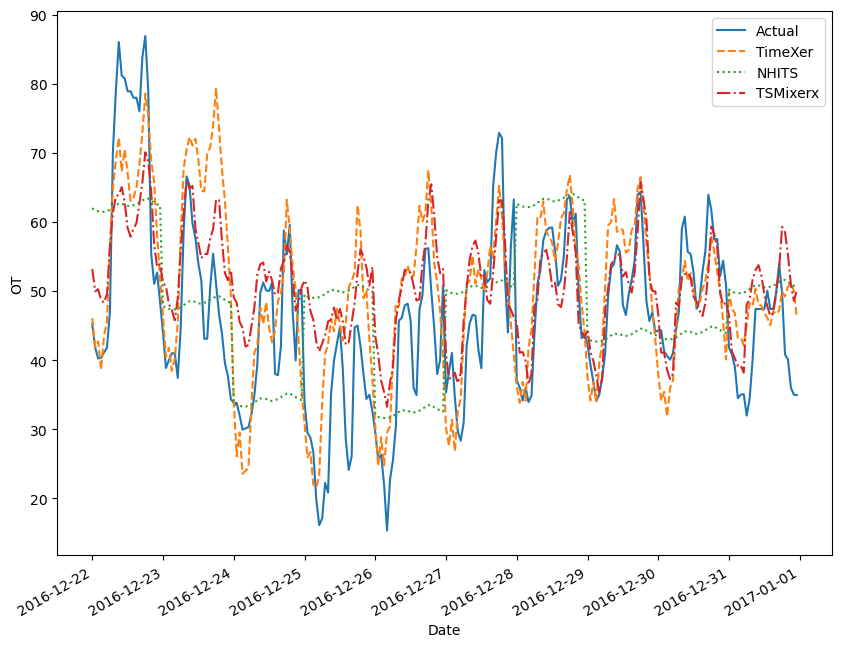

In [9]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(BE_cv_preds["ds"], BE_cv_preds["y"], label="Actual")
ax.plot(BE_cv_preds["ds"], BE_cv_preds["TimeXer"], label="TimeXer", ls="--")
ax.plot(BE_cv_preds["ds"], BE_cv_preds["NHITS"], label="NHITS", ls=":")
ax.plot(BE_cv_preds["ds"], BE_cv_preds["TSMixerx"], label="TSMixerx", ls="-.")
ax.set_xlabel("Date")
ax.set_ylabel("OT")
ax.legend()

fig.autofmt_xdate()

In [11]:
evaluation = evaluate(BE_cv_preds, metrics=[mae, mse], models=["NHITS", "TSMixerx", "TimeXer"])
evaluation

,unique_id,metric,NHITS,TSMixerx,TimeXer
0,BE,mae,11.150021,8.061764,7.675618
1,BE,mse,180.186051,103.168087,93.819246


## DE dataset (Denmark)

In [13]:
models = [
    TimeXer(
        h=HORIZON,
        input_size=INPUT_SIZE,
        n_series=1,
        futr_exog_list=DE_EXOG_LIST,
        patch_len=HORIZON,
        max_steps=1000
    ),
    NHITS(
        h=HORIZON,
        input_size=INPUT_SIZE,
        futr_exog_list=DE_EXOG_LIST,
        max_steps=1000
    ),
    TSMixerx(
        h=HORIZON,
        input_size=INPUT_SIZE,
        n_series=1,
        futr_exog_list=DE_EXOG_LIST,
        max_steps=1000
    )
]

nf = NeuralForecast(models=models, freq=FREQ)
DE_cv_preds = nf.cross_validation(DE_df, step_size=HORIZON, n_windows=10)
DE_cv_preds.head()

Seed set to 1
Seed set to 1
Seed set to 1
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type                   | Params | Mode 
----------------------------------------------------------------
0 | loss         | MAE                    | 0      | train
1 | padder_train | ConstantPad1d          | 0      | train
2 | scaler       | TemporalNorm           | 0      | train
3 | en_embedding | EnEmbedding            | 12.8 K | train
4 | ex_embedding | DataEmbedding_inverted | 86.5 K | train
5 | encoder      | Encoder                | 8.4 M  | train
6 | head         | FlattenHead            | 98.3 K | train
----------------------------------------------------------------
8.6 M     Trainable params
0         Non-trainable params
8.6 M     Total params
34.427    Total estimated model params size (MB)
59        Modules in train mode
0         Modules in eval mode


Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 19.16it/s, v_num=540, train_loss_step=12.10, train_loss_epoch=12.10]

`Trainer.fit` stopped: `max_steps=1000` reached.


Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 18.68it/s, v_num=540, train_loss_step=12.10, train_loss_epoch=12.10]


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 161.57it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 3.2 M  | train
-------------------------------------------------------
3.2 M     Trainable params
0         Non-trainable params
3.2 M     Total params
12.843    Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode


Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 20.15it/s, v_num=542, train_loss_step=5.460, train_loss_epoch=5.460]  

`Trainer.fit` stopped: `max_steps=1000` reached.


Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 19.61it/s, v_num=542, train_loss_step=5.460, train_loss_epoch=5.460]


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 176.49it/s]


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name                | Type              | Params | Mode 
------------------------------------------------------------------
0 | loss                | MAE               | 0      | train
1 | padder_train        | ConstantPad1d     | 0      | train
2 | scaler              | TemporalNorm      | 0      | train
3 | norm                | RevINMultivariate | 2      | train
4 | temporal_projection | Linear            | 4.1 K  | train
5 | feature_mixer_hist  | FeatureMixing     | 7.7 K  | train
6 | feature_mixer_futr  | FeatureMixing     | 7.6 K  | train
7 | first_mixing        | MixingLayer       | 30.5 K | train
8 | mixing_block        | Sequential        | 30.1 K | train
9 | out                 | Linear            | 65     | train
------------------------------------------------------------------
80.1 K    Trainable params
0         Non-trainable params
80.1 K    Total param

Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 21.89it/s, v_num=544, train_loss_step=6.460, train_loss_epoch=6.460]

`Trainer.fit` stopped: `max_steps=1000` reached.


Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 21.25it/s, v_num=544, train_loss_step=6.460, train_loss_epoch=6.460]


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 183.15it/s]


,unique_id,ds,cutoff,TimeXer,NHITS,TSMixerx,y
0,DE,2017-12-22 00:00:00,2017-12-21 23:00:00,48.679955,33.988960,35.983429,27.76
1,DE,2017-12-22 01:00:00,2017-12-21 23:00:00,49.398056,33.136978,34.257259,26.45
2,DE,2017-12-22 02:00:00,2017-12-21 23:00:00,51.404633,33.114243,35.753407,26.20
3,DE,2017-12-22 03:00:00,2017-12-21 23:00:00,54.926971,33.405449,37.673775,26.36
4,DE,2017-12-22 04:00:00,2017-12-21 23:00:00,58.131088,33.488808,39.238083,27.59


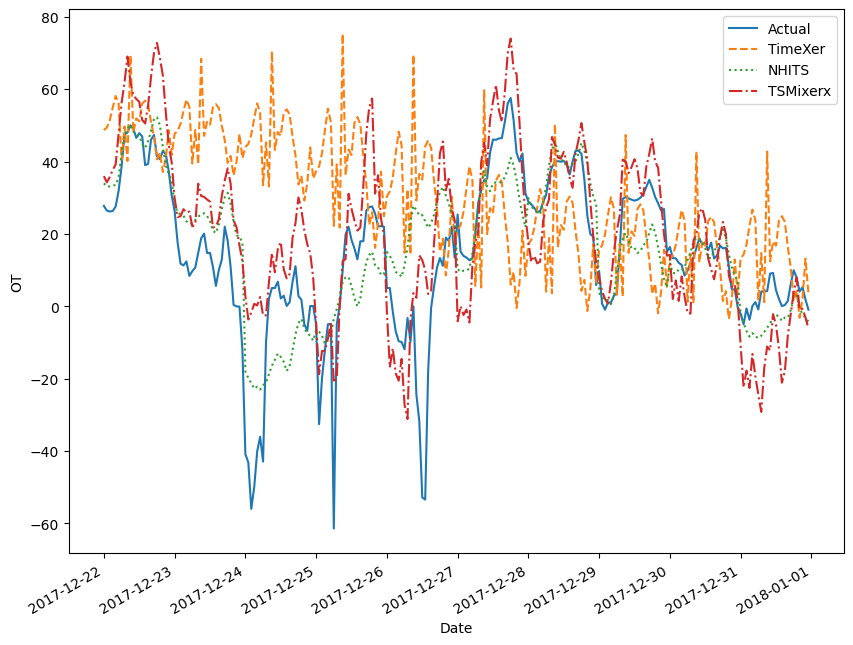

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(DE_cv_preds["ds"], DE_cv_preds["y"], label="Actual")
ax.plot(DE_cv_preds["ds"], DE_cv_preds["TimeXer"], label="TimeXer", ls="--")
ax.plot(DE_cv_preds["ds"], DE_cv_preds["NHITS"], label="NHITS", ls=":")
ax.plot(DE_cv_preds["ds"], DE_cv_preds["TSMixerx"], label="TSMixerx", ls="-.")
ax.set_xlabel("Date")
ax.set_ylabel("OT")
ax.legend()

fig.autofmt_xdate()

In [14]:
evaluation = evaluate(DE_cv_preds, metrics=[mae, mse], models=["NHITS", "TSMixerx", "TimeXer"])
evaluation

,unique_id,metric,NHITS,TSMixerx,TimeXer
0,DE,mae,10.404641,12.637785,25.132004
1,DE,mse,226.140068,273.762230,1104.224645
